In [1]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as npr

%matplotlib inline
import scipy.stats as stats

# Important Continuous Random Variables

There are numerous types of continuous random variables; in fact, Scipy.stats has over 100 (as of release 1.8.0).  A list of the continuous random variables in Scipy.stats can be found here:

https://docs.scipy.org/doc/scipy/reference/stats.html#continuous-distributions

In this section, we will present five continuous random variables that are used in the remainder of this textbook. Two of these we have already encountered: the continuous uniform random variable and the exponential random variable. We introduce three new continuous random variables: the Gaussian (or Normal), chi-squared, and Student's $t$ random variables.

## Continuous Uniform Random Variable

We introduced the continuous uniform random variable in {doc}`continuous-rvs`, where we used it to draw random arrival times for Poisson events observed on a fixed interval. We found the CDF to be linear over the random variable's range, and the pdf to be constant over the random variable's range. The range can be any interval (closed or open). If the range is $[a,b]$ for a uniform random variable $U$, then we write $U \sim \mbox{Uniform}[a,b]$ (read: "$U$ is distributed uniform on $[A,B]$. Then a formal definition of a uniform random variable is below.

````{card}
DEFINITION
^^^
```{glossary}
uniform random variable
    If $U$ is a uniform random variable on the interval $[a,b]$, then the probability density function $f_U(u)$ is 
    \begin{align} f_U(u) = 
    \begin{cases} 
    \frac{1}{b-a}, & u \in [a,b] \\
    0, & \mbox{otherwise} 
    \end{cases}
    \end{align}, 
    and the cumulative distribution function $F_U(u)$ is 
    \begin{align} F_U(u) = 
    \begin{cases} 
    0, & u < a \\
    \frac{u}{b-a}, & u \in [a,b] \\
    1, & u > b
    \end{cases}.
    \end{align} 
    Note that either or both endpoints may be excluded from the range of $U$, in which case the regions in the piecewise definition change slightly (for instance by dropping or adding an equality sign), but the functions are unchanged.
```
````

We can use SciPy.stats to create a uniform distribution by using `stats.uniform(start, length)`.

```{warning}

Note carefully the form of `stats.uniform(start, length)` -- the range is thus [start, start+length]. To create a variable $U$ representing a uniform distribution on $[a,b]$, we need to do `U = stats.uniform(a, b-a)`.
```

The density function for several uniform random variables is shown below:

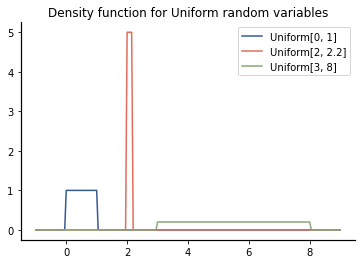

In [2]:
u = np.linspace(-1, 9, 201)
U1 = stats.uniform(0, 1)
U2 = stats.uniform(2, 0.2)
U3 = stats.uniform(3, 5)

plt.plot(u, U1.pdf(u), label="Uniform[0, 1]")
plt.plot(u, U2.pdf(u), label="Uniform[2, 2.2]")
plt.plot(u, U3.pdf(u), label="Uniform[3, 8]")

plt.legend()
plt.title("Density function for Uniform random variables");

The figure below shows the distribution functions for these random variables:

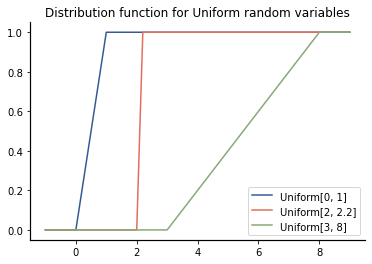

In [3]:
plt.plot(u, U1.cdf(u), label="Uniform[0, 1]")
plt.plot(u, U2.cdf(u), label="Uniform[2, 2.2]")
plt.plot(u, U3.cdf(u), label="Uniform[3, 8]")

plt.legend()
plt.title("Distribution function for Uniform random variables");

Note that the probability density is concentrated wherever the CDF is going up quickly.  Because the pdf is the derivative of the CDF, a steeper  slope in the CDF translates into a higher density in the pdf. 

**Applications:** Uniform random variables are used for any situation in which some random occurrence is equally likely to occur over a continuous range. For instance, it may model be used to model the random phase of packet in a wireless communication system. Most computer random number systems generate floating-point approximations of uniform random variables. The uniform distribution can also be shown to be the "most random" in a certain sense (maximizing a measure of randomness called entropy) over all distributions with finite range.

## Exponential Random Variable

We found that the exponential random variable models the time until the first Poisson arrival in an observation period. The exponential random variable is an example of a continuous random variable with an infinite range, since it can take on any value from $[0, \infty]$.  

A formal definition of the exponential random variable follows.

````{card}
DEFINITION
^^^
```{glossary}
exponential random variable
    If $X$ is an exponential random variable with real parameter $\lambda>0$, then the probability density function $f_X(x)$ is 
    \begin{align} f_X(x) = 
    \begin{cases} 
    0, & x <0 \\
    \lambda e^{-\lambda x}, & x \ge 0
    \end{cases}
    \end{align}, 
    and the cumulative distribution function $F_X(x)$ is 
    \begin{align} F_X(x) = 
    \begin{cases} 
    0, & x <0 \\
    1 - e^{- \lambda x}, & x \ge 0 \\
    \end{cases}.
    \end{align} 
```
````

```{note}

Some books specify the exponential distribution in terms of a parameter $\mu$ such that $\mu = 1/ \lambda$. The two definitions are equivalent, but the forms of the pdf and CDF are simpler and easier to remember when specified in terms of $\lambda$.

Note that we can avoid the piecewise notation for the pdf and CDF by using the unit-step function, which we will define piecewise as
\begin{equation}
u(x) = 
\begin{cases}
0, &x< 0 \\
1, & x \ge 0 \\
\end{cases}.
\end{equation}

Then 

$$
f_X(x) = \lambda e^{-\lambda x } u(x).
$$


(There are different versions of the unit step function that vary with how they handle the value at $x=0$. See https://en.wikipedia.org/wiki/Heaviside_step_function#Zero_argument for more details. We let $u(0)=1$ because we can use this $u(x)$ in the exponential density, which is usually defined to be non-zero for $x=0$. However, it usually does not matter for applications in probability because any one point has zero probability associated with .)
```

We can use SciPy.stats to create an exponential distribution with parameter `lam` using `stats.expon(scale= 1 / lam)`.

As we demonstrated before with the uniform random variable, it is possible for $f_X(x)$ to be greater than 1 because probability densities **are not probabilities**. In particular, at $x=0$, $f_X(0) = \lambda$, so $f_X(0)>1$ whenever $\lambda>1$. 

To further illustrate this, the pdf of lambda is shown below for a few different values of $\lambda$.



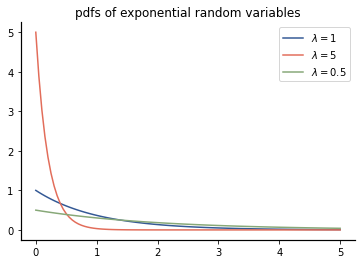

In [4]:
x = np.linspace(0, 5, 101)
lambdas = [1, 5, 1 / 2]
for lam in lambdas:
    X = stats.expon(scale=1 / lam)
    plt.plot(x, X.pdf(x), label="$\lambda  = " + str(lam) + "$")

plt.legend()
plt.title("pdfs of exponential random variables");

The CDFs for these values of $\lambda$ are shown below:

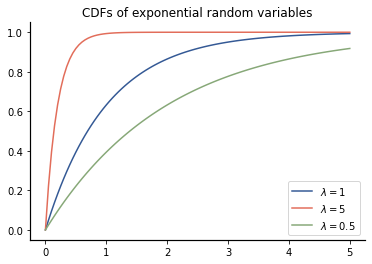

In [5]:
x = np.linspace(0, 5, 101)
lambdas = [1, 5, 1 / 2]
for lam in lambdas:
    X = stats.expon(scale=1 / lam)
    plt.plot(x, X.cdf(x), label="$\lambda  = " + str(lam) + "$")

plt.legend()
plt.title("CDFs of exponential random variables");

Again, note that the region in which the CDF is increasing from near 0 to near 1 represents the region where most of the probability is concentrated. This is particularly easy to see for exponential random variables: these regions all start at 0. We can then find a region of the form $[0,x]$ that contains 99\% of the probability in two ways:
* From the graph, if we look on the $y$ axis at 0.99 and then look right to see what value of $x$ intersects gives that value of $F_X(x)$.  Then that is the value of $x$ for which $F_X(x) = P(X \le x) = P (X \in [0,x]) =0.99.$  From the graph, the regions that contain approximately 99\% of the probability are: $[0,1]$ for $\lambda=5$ and $[0, 4.5]$ for $\lambda=1$.  
* We can also find these from the inverse CDF:

````{card}
DEFINITION
^^^
```{glossary}
inverse CDF
    If $X$ is a random variable with cumulative distribution function (CDF) $F_X(x) = P(X \le x)$, then the *inverse CDF*, which is also called the *quantile function* or *percent-point function* given a value $p$, gives a value of $x$ such that $F_X(x)=p$. It is the inverse of the CDF, $F^{-1}(p)$. 
```
````

SciPy.stats calls the inverse CDF the percent-point function, and evaluates it as `ppf(p)`. Thus, the regions that contain 99\% of the probability for the values of $\lambda$ considered are:

In [6]:
lambdas = [5, 1, 1 / 2]
for lam in lambdas:
    X = stats.expon(scale=1 / lam)
    upper = X.ppf(0.99)
    print(f"lambda = {lam}: [0, {upper :.2f}]")

lambda = 5: [0, 0.92]
lambda = 1: [0, 4.61]
lambda = 0.5: [0, 9.21]


**Example** An automotive company finds that 95% of its new LED headlights last more than 5 years. If the life of these headlights follows an exponential distribution, what is the probability that one of these headlights lasts more than 10 years?

*Solution:* The challenge in this problem is that we know that the distribution is exponential, but we do not know the parameter $\lambda$ that characterizes that distribution. However, we are given enough information to determine $\lambda$.

Let the life of one of these headlights in years be $X$, where $X \sim$ exponential($\lambda$). If 95% of the headlights last more than 5 years, then it must be that the probability that a particular headlight lasts more than 5 years is 0.95. In math, $P(X > 5) = 0.95$. 

Now, we can approach this in two ways. Let's start with the mathematical approach. 

\begin{align}
P(X > 5) & = 1 - P(X \le 5) \\
& = 1 - F_X(5) \\
& = 1 - \left( 1- e^{-\lambda (5)} \right) \\
&=  e^{-5 \lambda } = 0.95
\end{align}

Now, take the natural log of both sides. We need to know the natural log of 0.95:


In [7]:
np.log(0.95)

-0.05129329438755058

So,

\begin{align}
- 5  \lambda &\approx -0.051 \\
\Rightarrow \lambda \approx 0.0102.
\end{align}

The probability that a headlight lasts more than 10 years is then 

\begin{align}
P(X > 10 ) &= 1 - P(X \le 10) \\
&= 1 - F_X(10) \\
& = e^{-0.0102(10)},
\end{align}
which is approximately

In [8]:
np.exp(-0.0102 * 10)

0.9030295516688768

Thus, about 90% of headlights will last over 10 years under these assumptions.

```{note}

There is something interesting in these results that might not be immediately obvious. The probability that a headlight still functions decreases with the number of years as expected. However, consider those 95% of bulbs that are still functioning after 5 years. If we apply the same 95% rule to those bulbs to see how many are still functioning after another 5 years, we get $(0.95)^2 = 0.902$, which is essentially the same as the result we got above. This would mean that **after 5 years of use, those bulbs have the same probability of lasting another 5 years as a brand new bulb has of lasting for 5 years.**

We do not yet have the mathematical tools to analyze this, but it turns out that this is a special property, called the *memoryless property*, that is unique to the exponential distribution (among all continuous distributions).  We will investigate this property more in {doc}`conditioning-with-rvs`.
```

**Applications:** As previously noted, the exponential random variable models the time until the first Poisson arrival. It also models the time between two consecutive Poisson arrivals. It is also used in a related application called *survival analysis* when there is a constant *hazard rate*. For example, it can be used to model the lifetime of electrical devices.

## Normal (Gaussian) Random Variable

The Normal, or Gaussian, random variable is one of the most commonly used in statistical analyses. The term  *normal random variable* is more often used in statistics, whereas *Gaussian random variable* is more often used in electrical engineering. Either one is easily understood by the other community. Because this book is meant to be accessible to readers across engineering and the sciences and because SciPy.stats uses the term Normal, I will also use that terminology.

Before we give a formal definition of the Normal random variable, let's consider some examples that shows how the Normal distribution can emerge. 

We start with a sequence of binomial random variables with equal probability of success $p$ but different numbers of trials. As a reminder a Binomial($N,p$) random variable is the same as the sum of $N$ Bernoulli($p$) random variables. Let's consider $p=0.2$ and $N = 20, 40,$ and $200$ trials. Then the PMFs for these random variables are shown below:

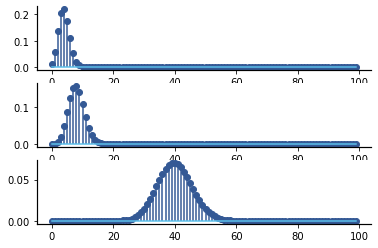

In [9]:
b = np.arange(0, 100)
fig, ax = plt.subplots(3)
for i, N in enumerate([20, 40, 200]):
    B = stats.binom(N, 0.2)
    ax[i].stem(b, B.pmf(b), use_line_collection=True)

Note that each of these PMFs has a similar shape -- called a *bell shape*, and each of the PMFs is centered at $0.2N$; i.e., the centers are 4, 8, and 40, respectively. If we treated these as the sum of Bernoulli random variables, then they would all be centered at 0.2 if we divided by $N$; i.e., if we calculated the *average value* of the variables instead of the sum. We can plot them on the same axes if we also switch to line plots:

(0.0, 1.0)

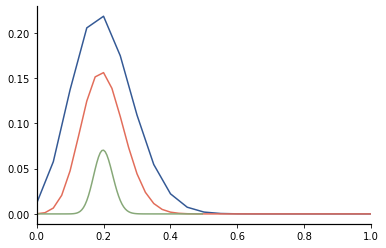

In [10]:
b = np.arange(0, 100)
for i, N in enumerate([20, 40, 200]):
    B = stats.binom(N, 0.2)
    scale_factor = N
    plt.plot(b / scale_factor, B.pmf(b))

plt.xlim(0, 1)

When we scaled the $x$-axis values, that *compressed* the probability into a smaller range more for large $N$ than for small $N$. Let's scale the PMFs **up** by the same factor to compensate for that:

(0.0, 1.0)

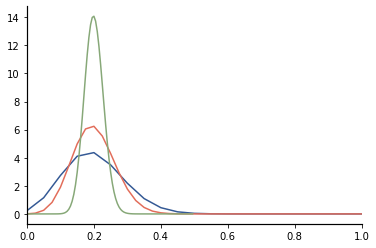

In [11]:
b = np.arange(0, 100)
for i, N in enumerate([20, 40, 200]):
    B = stats.binom(N, 0.2)
    scale_factor = N
    plt.plot(b / N, B.pmf(b) * N)

plt.xlim(0, 1)

We can see these are all bell shapes with different amounts of spreading. 

Now suppose we started with a completely different distribution. What if we wanted to find the distribution for sums of continuous uniform random variables instead of Binomial random variables.  We don't have a random distribution for the sum of an arbitrary number of uniform random variables, so let's estimate the distribution using simulation. It will be sufficient to just consider the sum of 20 uniform random variables, but feel free to test this with more or fewer!

We start by generating a matrix that contains 20 rows, each of which has 1,000,000 uniform[0,1] random variables:

In [12]:
U = stats.uniform()
u = U.rvs(size=(20, 1_000_000))

Now let's compute the average value across the rows (axis 0) and plot a histogram:

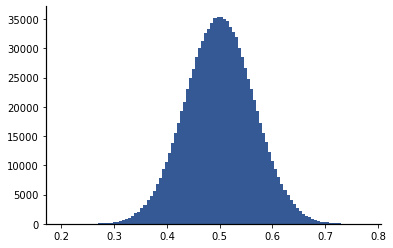

In [13]:
means = np.mean(u, axis=0)
plt.hist(means, bins=100);

Surprisingly, the histogram of the averages of this type of random variable **also has a bell shape**. 

It turns out that the average of almost any type of random variable converges to this bell shape under a set of very mild conditions. The shape is the shape of the Normal density:

````{card}
DEFINITION
^^^
```{glossary}
Normal (Gaussian) random variable
    If $X$ is a normal, or Gaussian, random variable with real parameters $\mu$ and $\sigma>0$,  then the probability density function $f_X(x)$ is 
    \begin{align} f_X(x) = 
     \frac{1}{\sigma\sqrt{2 \pi }}
      \exp \left\{ - \frac 1 2 \left[\frac{x-\mu}{\sigma}\right]^2 \right\}, ~~ -\infty < x < \infty
    \end{align}.
    The parameter $\mu$ is called the *mean*, and the parameter $\sigma$ is called the *standard deviation*.
```
````

```{note}
The Normal density is sometimes specified in terms of $\sigma^2$ (the variance) instead of $\sigma$ (the standard deviation) because it can be argued that variance is a more fundamental property of random variables.

I have chosen to use $\sigma$ for several reasons:
1. The units of $\sigma$ are the same as the units of $\mu$. We will see that either $\sigma$ or $\sigma^2$ control the spread of the probability density, but $\sigma$ has units that more directly translate to values we can understand and interpret on graphs. 
2. We will see that the term $(x-\mu)/\sigma$ arises in other aspects of working with Normal random variables and in other applications. 
3. SciPy.stats specifies Normal densities in terms of $\mu$ and $\sigma$, not $\sigma^2$.

In general, it is best to specify whether a parameter of a Normal random variable indicates standard deviation or variance. For instance, we might write $X \sim$ Normal($\mu=0$, $\sigma=5$).

```


From the form of the pdf, we can make several observations:
* The density is symmetric, and it is centered at $\mu$.
* The density rolls off double exponentially fast in the distance from $\mu$.
* The spread of the density away from the mean is controlled by the parameter $\sigma$.

In SciPy.stats, we can create a Gaussian distribution using `stats.norm(mu, sigma)`.  Note that we have to pass $\sigma$ (**NOT $\sigma^2$**) to `stats.norm`. 

Below are plots of the pdf for different values of $\mu$ and $\sigma$.

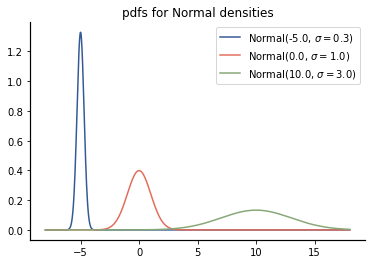

In [14]:
x = np.linspace(-8, 18, 1000)

all_params = [(-5, 0.3), (0, 1), (10, 3)]

for params in all_params:
    N = stats.norm(params[0], params[1])
    mylabel = f"Normal({N.mean()}, $\sigma=${N.std() :.1f})"
    plt.plot(x, N.pdf(x), label=mylabel)

plt.legend()
plt.title("pdfs for Normal densities");

Note that each density is centered on $\mu$ and symmetric about $\mu$. Note that larger $\sigma$ translates to the density being spread out wider around $\mu$ but also having a lower peak value. It should be somewhat intuitive that this would happen, as we know the pdf must integrate to 1.


Now you may be wondering -- why isn't the CDF included in this defintion? We usually don't specify the CDF for the Normal random variable because **the CDF can only be written as an integral equation**:

$$
F_X(x) = \int_{-\infty}^{x}    \frac{1}{\sigma \sqrt{2 \pi }}
      \exp \left\{ - \frac 1 2 \left[\frac{x-\mu}{\sigma}\right]^2 \right\} ~ dx.
$$

The distribution function is the area under the pdf from $-\infty$ to $x$, as shown by the shaded area in the figure below:


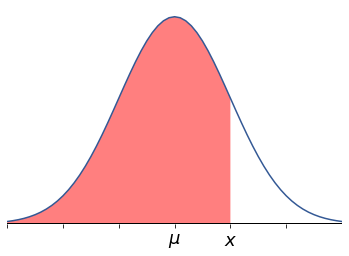

In [15]:
import matplotlib.ticker as mticker

fig = plt.figure()
N1 = stats.norm(0, 1)
x = np.arange(-3, 3.1, 0.1)
y = N1.pdf(x)

ax = fig.add_subplot(111)
x2 = np.arange(-3, 1.1, 0.1)
y2 = N1.pdf(x2)
plt.fill_between(x2, 0, y2, facecolor="red", alpha=0.5)
# ax.axes.xaxis.set_ticklabels(['','','$b$','$\mu$','',''],fontsize=18)
# ticks_loc = ax.get_yticks().tolist()
# ax.yaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
ax.set_xticks(np.arange(-3, 3, 1))
ax.set_xticklabels(["", "", "", "$\mu$", "$x$", ""], fontsize=18)
ax.set_frame_on(False)
ax.axes.get_yaxis().set_visible(False)
ax.plot(x, y)
plt.xlim([-3, 3])
xmin, xmax = ax.get_xaxis().get_view_interval()
ymin, ymax = ax.get_yaxis().get_view_interval()
ymin=0
plt.ylim(ymin, ymax)
ax.add_artist(plt.Line2D((xmin, xmax), (ymin, ymin), color="black", linewidth=2))
ax.get_xaxis().tick_bottom()

We will refer to a normal distribution with $\mu=0$ and $\sigma=1$ as the *standard Normal* distribution. The CDF for the standard Normal random variable is often denote $\Phi(x)$.

We will often have the need to calculate the survival function, $1-F_X(x)$ for a Normal random variable. For a standard Normal random variable, the survival function is often denoted $Q(x)$ and is typically written as

$$
Q(x) =   \frac{1}{\sqrt{2 \pi}} \int_{x}^{\infty}    
      e^{ - \frac{t^2}{2} } ~ dt.
$$

Note that we almost always evaluate $Q(x)$ for $x>0$ because we can exploit properties of the distribution to need to evaluate it for $-x$, as explained further in [](evaluating-gaussian-probs). The $Q$-function is the area from $x$ to $\infty$ under the pdf of the standard Normal random variable, as shown in the figure below:

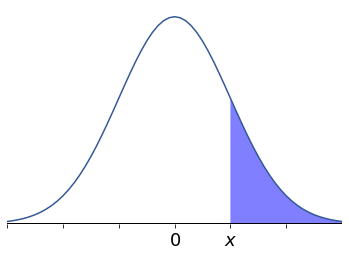

In [16]:
N2 = stats.norm(0, 1)
x = np.arange(-3, 3.1, 0.1)
y = N2.pdf(x)

fig = plt.figure()
ax = fig.add_subplot(111)
x2 = np.arange(1, 3.1, 0.1)
y2 = N2.pdf(x2)
plt.fill_between(x2, 0, y2, facecolor="blue", alpha=0.5)
ax.set_xticks(np.arange(-3,3,1))
ax.axes.xaxis.set_ticklabels(["", "", "", "$0$", "$x$", ""], fontsize=18)
ax.set_frame_on(False)
ax.axes.get_yaxis().set_visible(False)
ax.plot(x, y)
plt.xlim([-3, 3])

xmin, xmax = ax.get_xaxis().get_view_interval()
ymin, ymax = ax.get_yaxis().get_view_interval()
ymin=0
plt.ylim(ymin, ymax)
ax.add_artist(plt.Line2D((xmin, xmax), (ymin, ymin), color="black", linewidth=2))
ax.get_xaxis().tick_bottom()

The CDF and survival function for a Gaussian$(\mu,\sigma^2)$ random variable are

```{math}
:label: general-gaussian-cdf
\Phi \left(\frac{x-\mu}{\sigma} \right)
```

and
```{math}
:label: general-gaussian-sf
\operatorname{Q} \left(\frac{x-\mu}{\sigma} \right).
```

```{warning}
Note that the argument of these functions has the same form that we saw in the Normal pdf. The denominator is $\sigma$, not $\sigma^2$!
```

Since the $Q()$ function is the survival function of the standard Normal random variable, we can create a very simple function to evaluate it:

In [17]:
def q(x):
  return stats.norm.sf(x)


For $x>0$, another convenient form for $Q(x)$  is

$$
Q(x) =   \frac 1 \pi \int_{0}^{\pi/2} \exp \left( - \frac{x^2}{2 \sin^2 \theta} \right) ~d \theta.
$$

There are many good approximations and bounds for the $Q$ function that are appropriate for programming into an electronic calculator or for using in analysis when the integral forms are prevent further simplication of expressions. The [Wikipedia page on the Q-function](https://en.wikipedia.org/wiki/Q-function#Bounds_and_approximations) has an excellent list. One that is worth pointing out because of its simplicity and accuracy for large values of its argument is this one, which is known as an improved Chernoff bound:

$$
Q(x) \le \frac 1 2 e^{-x^2 / 2}.
$$


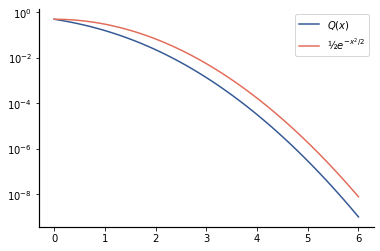

In [18]:
x=np.linspace(0,6,61)
plt.semilogy(x,q(x), label='$Q(x)$')
plt.semilogy(x, 0.5 * np.exp(-x**2 / 2), label='\u00BD$e^{-x^2/2}$' )
plt.legend();


In this book, I will assume that you have access to a computer and SciPy.stats, so I am not going to spend additional time on how to actually evaluate the $Q$ function. Note that the inverse $Q$ function is simply the inverse survival function, which in SciPy.stats is `norm.isf(p)`. For clarity of notation, we can define a `qinv()` function as

In [19]:
def qinv(p):
    return stats.norm.isf(p)

The CDFs are shown below for the same set of parameters:

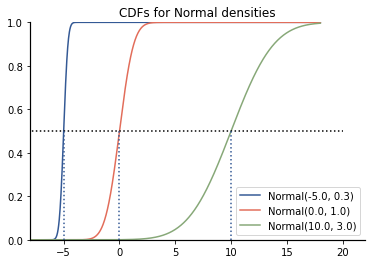

In [20]:
x = np.linspace(-8, 18, 1000)

all_params = [(-5, 0.3), (0, 1), (10, 3)]
for params in all_params:
    N = stats.norm(params[0], params[1])
    mylabel = f"Normal({N.mean()}, {N.std() :.1f})"
    plt.plot(x, N.cdf(x), label=mylabel)

plt.plot([-10, 20], [0.5, 0.5], "k:")
plt.vlines([0, 10, -5], ymin=0, ymax=0.5, linestyles="dotted")
plt.xlim(-8, 22)
plt.ylim(0, 1)
plt.legend(loc=4)
plt.title("CDFs for Normal densities");

The dotted lines show that the point that achieves $F_X(x) =P(X \le x) =0.5$ is $\mu$ for each of these distributions. This should be expected from our previous observations: since the distribution is symmetric around $\mu$, it must be that half of the probability is on each side of $\mu$. 

Note that the steepness of the CDF curves depends on the value of $\sigma$ (and not on the value of $\mu$). Larger $\sigma$ results in the CDF curve being less steep because the probability is spread out over a wider range.

(evaluating-gaussian-probs)=
### Evaluating Gaussian Probabilities

For a Gaussian random variable, the probability of any interval can be written as a simple function involving the $Q$-function with positive arguments. Consider $X \sim$Gaussian$(\mu, \sigma),$ where $\sigma >0$. We consider several cases below.

1. The easiest case is a "right tail", $P(X>x)$, where $x>\mu$. This scenario is illustrated below:

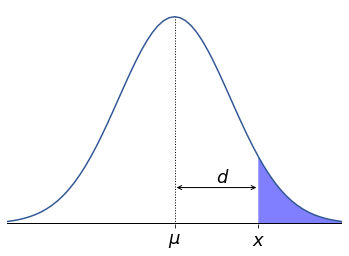

In [21]:
N3 = stats.norm(0, 1)
x = np.arange(-3, 3.1, 0.1)
y = N3.pdf(x)
realmax=y.max()

fig = plt.figure()
ax = fig.add_subplot(111)
x2 = np.arange(1.5, 3.1, 0.1)
y2 = N2.pdf(x2)

plt.fill_between(x2, 0, y2, facecolor="blue", alpha=0.5)
ticks=[0, 1.5]
ax.set_xticks(ticks)
ax.axes.xaxis.set_ticklabels([ "$\mu$",  "$x$"], fontsize=18)
ax.set_frame_on(False)
ax.axes.get_yaxis().set_visible(False)
ax.plot(x, y)
plt.xlim([-3, 3])

xmin, xmax = ax.get_xaxis().get_view_interval()
ymin, ymax = ax.get_yaxis().get_view_interval()
ymin=0
plt.ylim(ymin, ymax)
ax.add_artist(plt.Line2D((xmin, xmax), (ymin, ymin), color="black", linewidth=2))
ax.get_xaxis().tick_bottom()
height=ymax/6
ax.annotate("",
            xy=(0, height), xycoords='data',
            xytext=(1.5, height), textcoords='data',
            arrowprops=dict(arrowstyle="<->",
                            connectionstyle="arc3"),
            )
ax.annotate("$d$",
            xy=(0.7, height*1.15), xycoords='data',
            xytext=(0.75, height*1.15), textcoords='data', fontsize=18
            );
plt.vlines(x=0, ymin=0, ymax=realmax, color='k', ls=':', lw=1);

From {eq}`general-gaussian-sf`, 

$$
P(X > x ) = Q \left( \frac{ x- \mu}{\sigma} \right).
$$

Note that the distance between the threshold $x$ and the mean $\mu$ is $d=x-\mu$.  Then we can write

$$
P(X > x ) = Q \left( \frac d \sigma \right).
$$

Although introducing $d$ may seem like an unnecessary step at this point, we will soon show why this is useful.

2. Now consider a "left tail", $P(X < y)$, where $y < \mu$. This scenario is illustrated below:

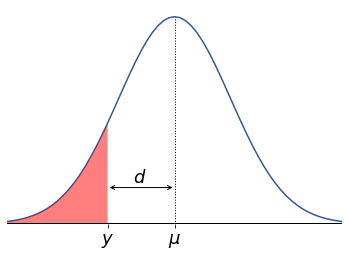

In [22]:
import matplotlib.ticker as mticker

fig = plt.figure()
N1 = stats.norm(0, 1)
x = np.arange(-3, 3.1, 0.1)
y = N1.pdf(x)

ax = fig.add_subplot(111)
x2 = np.arange(-3, -1.1, 0.1)
y2 = N1.pdf(x2)
plt.fill_between(x2, 0, y2, facecolor="red", alpha=0.5)
# ax.axes.xaxis.set_ticklabels(['','','$b$','$\mu$','',''],fontsize=18)
# ticks_loc = ax.get_yticks().tolist()
# ax.yaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
#ax.set_xticks(np.arange(-3, 3, 1))
#ax.set_xticklabels(["", "", "", "$\mu$", "$x$", ""], fontsize=18)
ticks=[-1.2, 0]
ax.set_xticks(ticks)
ax.axes.xaxis.set_ticklabels(["$y$", "$\mu$"], fontsize=18)
ax.set_frame_on(False)
ax.axes.get_yaxis().set_visible(False)
ax.plot(x, y)
plt.xlim([-3, 3])
xmin, xmax = ax.get_xaxis().get_view_interval()
ymin, ymax = ax.get_yaxis().get_view_interval()
ymin=0
plt.ylim(ymin, ymax)
ax.add_artist(plt.Line2D((xmin, xmax), (ymin, ymin), color="black", linewidth=2))
ax.get_xaxis().tick_bottom()
height=ymax/6
ax.annotate("",
            xy=(-1.2, height), xycoords='data',
            xytext=(0, height), textcoords='data',
            arrowprops=dict(arrowstyle="<->",
                            connectionstyle="arc3"),
            )
ax.annotate("$d$",
            xy=(-1, height*1.15), xycoords='data',
            xytext=(-0.75, height*1.15), textcoords='data', fontsize=18
            );
plt.vlines(x=0, ymin=0, ymax=realmax, color='k', ls=':', lw=1);

Note that 

$$
P(Y \le y) = F_Y(y) = \Phi\left( \frac { y -\mu}{\sigma} \right).
$$

However, we are going to use the standard that every Normal probability should be expressed in terms of $Q()$ instead of $\Phi$. There are several ways to proceed. One is to use the mathematical relation $\Phi(z) = 1 - Q(z)$. An alternative is to take advantage of the symmetry of the Normal density around the mean, $\mu$. If we reflect the region $Y \le y$ around an axis located at $\mu$, then the probability of the reflected region will be equal to the $P(Y \le y)$. To preserve the symmetry of the region, the reflected region must be at the same distance, $d = \mu - y$, from $\mu$. Thus, the reflected region is $X \ge \mu + d = 2 \mu -y$. The result is shown in the dark shaded region below:

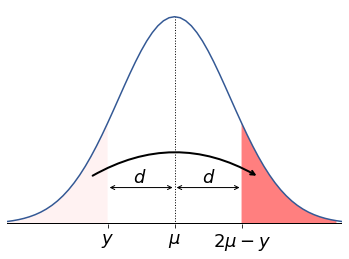

In [23]:
import matplotlib.ticker as mticker

fig = plt.figure()
N1 = stats.norm(0, 1)
x = np.arange(-3, 3.1, 0.1)
y = N1.pdf(x)

ax = fig.add_subplot(111)
x2 = np.arange(-3, -1.1, 0.1)
y2 = N1.pdf(x2)
plt.fill_between(x2, 0, y2, facecolor="red", alpha=0.05)

ticks=[-1.2, 0, 1.2]
ax.set_xticks(ticks)
ax.axes.xaxis.set_ticklabels(["$y$", "$\mu$", "$2\mu -y$"], fontsize=18)
ax.set_frame_on(False)
ax.axes.get_yaxis().set_visible(False)
ax.plot(x, y)
plt.xlim([-3, 3])
xmin, xmax = ax.get_xaxis().get_view_interval()
ymin, ymax = ax.get_yaxis().get_view_interval()
ymin=0
plt.ylim(ymin, ymax)
ax.add_artist(plt.Line2D((xmin, xmax), (ymin, ymin), color="black", linewidth=2))
ax.get_xaxis().tick_bottom()
height=ymax/6
ax.annotate("",
            xy=(-1.2, height), xycoords='data',
            xytext=(0, height), textcoords='data',
            arrowprops=dict(arrowstyle="<->",
                            connectionstyle="arc3"),
            )
ax.annotate("$d$",
            xy=(-1, height*1.15), xycoords='data',
            xytext=(-0.75, height*1.15), textcoords='data', fontsize=18
            );
plt.vlines(x=0, ymin=0, ymax=realmax, color='k', ls=':', lw=1);

x3 = np.arange(1.2, 3, 0.1)
y3 = N1.pdf(x3)
plt.fill_between(x3, 0, y3, facecolor="red", alpha=0.5)

ax.annotate("",
            xy=(0,height), xycoords='data',
            xytext=(1.2, height), textcoords='data',
            arrowprops=dict(arrowstyle="<->",
                            connectionstyle="arc3"),
            )
ax.annotate("$d$",
            xy=(-1, height*1.15), xycoords='data',
            xytext=(0.5, height*1.15), textcoords='data', fontsize=18
            );

ax.annotate("",
            xy=(-1.5, height*1.3), xycoords='data',
            xytext=(1.5, height*1.3), textcoords='data', 
            arrowprops=dict(arrowstyle="<-",
                            connectionstyle="angle3,angleA=-30,angleB=-150", lw=2)
           );

Then using {eq}`general-gaussian-sf`, the probabilty of the reflected region is

\begin{align}
P(X \ge 2 \mu -y) &= Q \left( \frac{2\mu -y -\mu}{\sigma} \right) \\
&= Q \left( \frac{\mu -y}{\sigma} \right) \\
&= Q \left( \frac{d}{\sigma} \right).
\end{align}

**The probability in a tail of the Gaussian density that is at distance $d$ from the mean is $Q(d/\sigma)$.**

3. Consider next the probability of a region that does not include the mean. For example, $P(a < X \le b),$ where $a> \mu$.  The corresponding region of probability density is shown below:

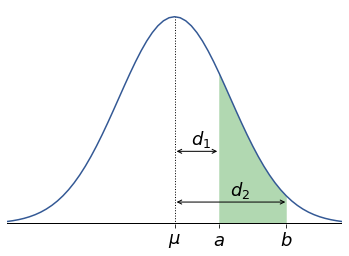

In [24]:
N3 = stats.norm(0, 1)
x = np.arange(-3, 3.1, 0.1)
y = N3.pdf(x)
realmax=y.max()

fig = plt.figure()
ax = fig.add_subplot(111)
x2 = np.arange(.8, 2.02, 0.01)
y2 = N2.pdf(x2)
plt.fill_between(x2, 0, y2, facecolor="green", alpha=0.3)

ticks=[0, 0.8, 2]
ax.set_xticks(ticks)
ax.axes.xaxis.set_ticklabels([ "$\mu$",  "$a$", '$b$'], fontsize=18)
ax.set_frame_on(False)
ax.axes.get_yaxis().set_visible(False)
ax.plot(x, y)
plt.xlim([-3, 3])

xmin, xmax = ax.get_xaxis().get_view_interval()
ymin, ymax = ax.get_yaxis().get_view_interval()
ymin=0
plt.ylim(ymin, ymax)
ax.add_artist(plt.Line2D((xmin, xmax), (ymin, ymin), color="black", linewidth=2))
ax.get_xaxis().tick_bottom()
height=ymax/6
ax.annotate("",
            xy=(0, height*2), xycoords='data',
            xytext=(0.8, height*2), textcoords='data',
            arrowprops=dict(arrowstyle="<->",
                            connectionstyle="arc3"),
            )
ax.annotate("$d_1$",
            xy=(0.4, height*2.2), xycoords='data',
            xytext=(0.3, height*2.2), textcoords='data', fontsize=18
            );
plt.vlines(x=0, ymin=0, ymax=realmax, color='k', ls=':', lw=1);

ax.annotate("",
            xy=(0, height*0.6), xycoords='data',
            xytext=(2.02, height*0.6), textcoords='data',
            arrowprops=dict(arrowstyle="<->",
                            connectionstyle="arc3"),
            )
ax.annotate("$d_2$",
            xy=(0.4, height*0.8), xycoords='data',
            xytext=(1, height*0.8), textcoords='data', fontsize=18
            );

Note that the event $Y >  a$ can be written as $a < Y \le b \cup Y > b$, where the events $\{s | a < Y \le b\}$ and $\{s |Y>b\}$ are mutually exclusive. Then

\begin{align}
P (Y > a) &= P( a < Y \le b) + P(Y>b) \\
\Rightarrow P( a < Y \le b) &= P(Y>a) - P(Y>b).
\end{align}
Let $d_1$ and $d_2$ be the distances from the mean to $a$ and $b$, respectively; i.e., $d_1 =  a-\mu$ and $d_2 = b-\mu$. Then 

\begin{align}
 P( a < Y \le b) &= Q\left( \frac {d_1}{\sigma} \right) 
 -Q\left( \frac {d_2}{\sigma} \right).
\end{align}



4. For our final case, consider a region that includes the mean. For example, $P(g < X \le h)$, where $g < \mu < h$. The corresponding region of probability density is shown below: 

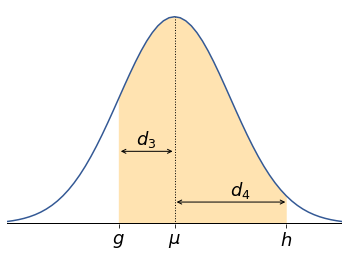

In [25]:
N3 = stats.norm(0, 1)
x = np.arange(-3, 3.1, 0.1)
y = N3.pdf(x)
realmax=y.max()

fig = plt.figure()
ax = fig.add_subplot(111)
x2 = np.arange(-1, 2.02, 0.01)
y2 = N3.pdf(x2)
plt.fill_between(x2, 0, y2, facecolor="orange", alpha=0.3)

ticks=[-1, 0, 2]
ax.set_xticks(ticks)
ax.axes.xaxis.set_ticklabels(['$g$', '$\mu$',  '$h$'], fontsize=18)
ax.set_frame_on(False)
ax.axes.get_yaxis().set_visible(False)
ax.plot(x, y)
plt.xlim([-3, 3])

xmin, xmax = ax.get_xaxis().get_view_interval()
ymin, ymax = ax.get_yaxis().get_view_interval()
ymin=0
plt.ylim(ymin, ymax)
ax.add_artist(plt.Line2D((xmin, xmax), (ymin, ymin), color="black", linewidth=2))
ax.get_xaxis().tick_bottom()
height=ymax/6
ax.annotate("",
            xy=(0, height*2), xycoords='data',
            xytext=(-1, height*2), textcoords='data',
            arrowprops=dict(arrowstyle="<->",
                            connectionstyle="arc3"),
            )
ax.annotate("$d_3$",
            xy=(0.4, height*2.2), xycoords='data',
            xytext=(-0.7, height*2.2), textcoords='data', fontsize=18
            );
plt.vlines(x=0, ymin=0, ymax=realmax, color='k', ls=':', lw=1);

ax.annotate("",
            xy=(0, height*0.6), xycoords='data',
            xytext=(2.02, height*0.6), textcoords='data',
            arrowprops=dict(arrowstyle="<->",
                            connectionstyle="arc3"),
            )
ax.annotate("$d_4$",
            xy=(0.4, height*0.8), xycoords='data',
            xytext=(1, height*0.8), textcoords='data', fontsize=18
            );

For this type of probability, the easiest way to write it in terms of $Q()$ functions is to consider the complimentary event. I.e., 

\begin{align}
P(g < X \le h) &= 1 - P\left( \overline{g < X \le h}\right) \\
&= 1 - \left[ P\left(X\le g \cup X>h \right)\right].
\end{align}

The region of probability density for  $X\le g \cup X>h$ is shown below:

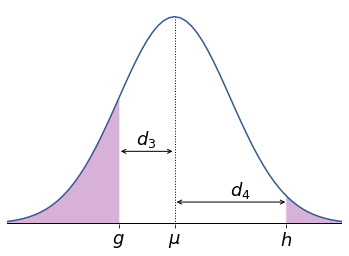

In [26]:
N3 = stats.norm(0, 1)
x = np.arange(-3, 3.1, 0.1)
y = N3.pdf(x)
realmax=y.max()

fig = plt.figure()
ax = fig.add_subplot(111)
x2 = np.arange(-3, -0.98, 0.01)
y2 = N3.pdf(x2)
plt.fill_between(x2, 0, y2, facecolor="purple", alpha=0.3)

x3 = np.arange(2, 3.01, 0.01)
y3 = N3.pdf(x3)
plt.fill_between(x3, 0, y3, facecolor="purple", alpha=0.3)



ticks=[-1, 0, 2]
ax.set_xticks(ticks)
ax.axes.xaxis.set_ticklabels(['$g$', '$\mu$',  '$h$'], fontsize=18)
ax.set_frame_on(False)
ax.axes.get_yaxis().set_visible(False)
ax.plot(x, y)
plt.xlim([-3, 3])

xmin, xmax = ax.get_xaxis().get_view_interval()
ymin, ymax = ax.get_yaxis().get_view_interval()
ymin=0
plt.ylim(ymin, ymax)
ax.add_artist(plt.Line2D((xmin, xmax), (ymin, ymin), color="black", linewidth=2))
ax.get_xaxis().tick_bottom()
height=ymax/6
ax.annotate("",
            xy=(0, height*2), xycoords='data',
            xytext=(-1, height*2), textcoords='data',
            arrowprops=dict(arrowstyle="<->",
                            connectionstyle="arc3"),
            )
ax.annotate("$d_3$",
            xy=(0.4, height*2.2), xycoords='data',
            xytext=(-0.7, height*2.2), textcoords='data', fontsize=18
            );
plt.vlines(x=0, ymin=0, ymax=realmax, color='k', ls=':', lw=1);

ax.annotate("",
            xy=(0, height*0.6), xycoords='data',
            xytext=(2.02, height*0.6), textcoords='data',
            arrowprops=dict(arrowstyle="<->",
                            connectionstyle="arc3"),
            )
ax.annotate("$d_4$",
            xy=(0.4, height*0.8), xycoords='data',
            xytext=(1, height*0.8), textcoords='data', fontsize=18
            );

This probability can be calculated as the sum of two tail probabilities, which we already know how to calculated. The result is

\begin{align}
P(g < X \le h) &= 1 - Q\left( \frac{d_3}{\sigma}\right) - Q\left( \frac{d_4}{\sigma}\right) \\
&= 1 - Q\left( \frac{\mu -g }{\sigma}\right) - Q\left( \frac{h- \mu}{\sigma}\right) .
\end{align}

**Example**

The plot below shows the heights for approximately 14,000 people in the [US National Health and Nutrition Examination Survey (NHANES) for 2017–March 2020](https://wwwn.cdc.gov/Nchs/Nhanes/Search/DataPage.aspx?Component=Examination&Cycle=2017-2020). The data comes from the Body Measures data set. Note that this data set includes both adults and children, so the combined data is clearly not Normal. However, there seems to be a strong Normal component in the higher height, which likely correspond to the adults in the survey.

Using this data set, estimate the probability that an adult is over 7 feet tall. 


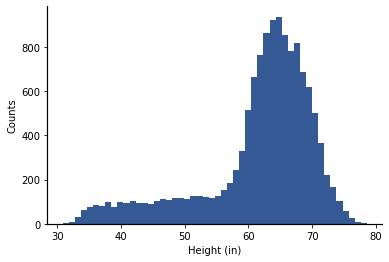

In [27]:
import pandas as pd
df=pd.read_sas("https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/P_BMX.XPT")
counts, bins, plot = plt.hist(df['BMXHT']/2.54,bins=50);
plt.xlabel('Height (in)');
plt.ylabel('Counts');

*Solution*

This problem is very different from our previous problems because we cannot answer it directly from the data. Since this data set contains no heights that are greater than 7 feet, any resampling of the data will also have no heights greater than 7 feet. Thus, an estimate that uses only resampling will always estimate the probability of a person being over 7 feet tall as 0, which we know is not correct. 

One way to deal with this problem is to use a *model-based* approach. That is, we assume that we have a model for the data, and use this model to answer the question. Looking at the right-hand side of the histogram, we can choose to model the heights of adults in the US using a Normal distribution. We need to know two parameters to specify the Normal distribution: the mean $\mu$ and the variance $\sigma^2$.  We don't yet know how to estimate these parameters directly, and even if we did, the fact that the adult data is mixed with juvenile data would make this challenging. 

For now, we will estimate these parameters by manually searching for a good match between the Normal density and the normalized histogram. The interactive widget below can b used to experiment with fitting the density to the histogram by varying the mean and variance. There is also a third parameter, scale, which is used to reduce the density of the Normal model by a scaling factor to compensate for the fact that not all of the histogram data is associated with adults. 

**Adjust the parameters below so that the Normal density (the smooth curve) matches the main bell shape in the data as closely as possible:**


In [28]:
import ipywidgets as widgets
from ipywidgets import interact



def plot_normal_density(mean, sdev, scale):


  N=stats.norm(mean, scale=sdev)
  n=np.linspace(50,80,31)

  plt.clf()
  counts, bins, plot = plt.hist(df['BMXHT']/2.54,bins=50, density=True);


  plt.plot(n, scale*N.pdf(n) )
  plt.show()


interact(
  plot_normal_density,
  mean=widgets.FloatSlider(
    min=62,
    max=68,
    step=0.05,
    value=60,
    description="$\mu$",
    style={"description_width": "initial"},
  ),
  sdev=widgets.FloatSlider(
    min=3,
    max=6,
    step=0.1,
    value=3,
    description="$\sigma$",
    style={"description_width": "initial"},
  ),
  scale=widgets.FloatSlider(
    min=0.5,
    max=1,
    step=0.01,
    value=1,
    description="scale",
    style={"description_width": "initial"},
  )  
);

interactive(children=(FloatSlider(value=62.0, description='$\\mu$', max=68.0, min=62.0, step=0.05, style=Slide…

Your values may differ, but the values that I found to best match are:
* $\mu$ = 65.05
* $\sigma$=4.9
* scale = 0.92

Given these values, we can model the height of a random US adult as $H \sim $Normal($\mu = 65.1$, $\sigma^2 = 23.2)$. Then the probability that a randomly chosen adult is over 7 feet (i.e., 84 inches) is $P(H>84)$. We can directly evaluate this using SciPy.stats as follows:


In [29]:
H = stats.norm(65.05, scale = 4.9 )
H.sf(12*7)

5.5012921622610294e-05

We can also easily express this using the $Q$ function by noting that the distance from the mean to the threshold is $d = 84-65.1 = 18.9$,  so

$$
P(H > 84 ) = Q \left( \frac{d}{\sigma }\right) \approx Q \left( \frac{18.9}{4.9 }\right)  \approx Q (3.86),
$$
which is


In [30]:
q(3.86)

5.669351253425653e-05

So the probability that a randomly chosen adult in the US is over 7 feet tall should be about $6 \times 10^{-5}$. This estimate may be low because the data we used to generate this model also includes adolescents, which may skew the data toward lower heights. Fortunately, we can check this result using another data set. 

The Behavioral Risk Factor Surveillance System (BRFSS) Surve  is a telephone survey of US residents that is sponsored by the US Centers for Disease Control and other federal agencies. Here is a link to the [2020 BRFSS survey data](https://www.cdc.gov/brfss/annual_data/annual_2020.html), which includes over 400,000 respondents. The heights (in inches) are shown in the figure below:





In [31]:
# import pandas as pd
# df2=pd.read_sas("LLCP2020.XPT")
# heights=df2['HTIN4'].copy()
# import pickle
# with open('heights.pkl','wb') as f:
#   pickle.dump(heights, f)
# counts2, bins2, plot2 = plt.hist(heights,
#                                  bins=np.arange(50,90,1))
# plt.xlabel('Height (in)');
# plt.ylabel('Counts');
# plt.title('Histogram of Heights from the 2020 BRFSS Survey');

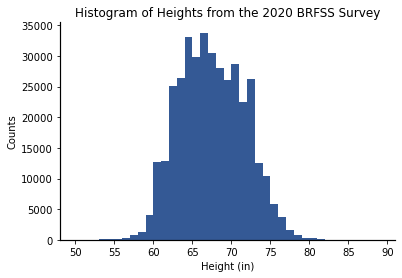

In [32]:
import pickle
with open('data/heights.pkl','rb') as f:
  heights = pickle.load(f)
counts2, bins2, plot2 = plt.hist(heights,
                                 bins=np.arange(50,90,1))
plt.xlabel('Height (in)');
plt.ylabel('Counts');
plt.title('Histogram of Heights from the 2020 BRFSS Survey');

In this data set, the relative frequency of heights over 7 feet is $5.5 \times 10^{-5}$, which is extremely close to our estimate using the NHANES data set.

**Example**

A professor asks her TA how the students did on an exam. The TA provided the following information:
* The data looks like it follows a Normal distribution with mean $\mu=83$.
* 10% of the students got a C or lower (less than 70).

If the threshold for an A is 90, what is the probablity that a randomly chosen student got an A?

*Solution*

As in the last example, we have a *model* for our data. This time, we do not have to estimate the parameters of the model from data, but we are also not directly given all the parameters. We know $\mu=83$, but we will also need $\sigma^2$ before we can answer the question.  To get $\sigma^2$, we can use the second piece of information we were given: 10% of students got a C or lower.  If $G$ is the grade on the exam, then $P(G \le 70) =0.1$. Thus,

\begin{align*}
P(G \le 70) &= 0.1 \\
Q \left( \frac{ \mu-70}{\sigma} \right) & =0.1 \\
 \frac{ 83-70}{\sigma}  & =Q^{-1} (0.1) \\
 \sigma & = \frac{13}{Q^{-1} (0.1)} \\
\end{align*}

Thus, the standard deviation, $\sigma$, is approximately

In [33]:
13/qinv(0.1)

10.143953898940929

Now that our model is fully specified, we can answer the main question: what is the probability that a randomly chosen student got an A ($G \ge 90$)?

\begin{align}
P( G \ge 90) &= Q \left( \frac{90-\mu}{\sigma} \right)\\
 &= Q \left( \frac{90-83}{10.1} \right),
\end{align}
which is approximately

In [34]:
q( (90-83)/10.1 )

0.24413302914341584

Thus, the probability that a randomly chosen student got an A is 24.4%.

**JMS: Add questions to check understanding here.**

### Central Limit Theorem

The Central Limit Theorem (CLT) says that the CDF function for the average of $M$ of almost any type of random variables will converge to a Normal CDF as $M$ goes to infinity. This is a remarkable result that is useful for two different reasons:
1. Many phenomena can be modeled using the Normal distribution if they come from aggregating or averaging other phenomena.
2. For many random models, such as Binomial or Poisson, with a large number of trials, it becomes difficult to calculate the probabilities. In such cases, we can approximate the probabilities using a Normal approximation and compute the probabilities using the $Q$-function.

In reality, there are many different Central Limit Theorems, and the details of all of them are outside of the scope of this book. If you are interested in learning more, the [Wikipedia page on the Central limit theorem](https://en.wikipedia.org/wiki/Central_limit_theorem) is a good place to start.

We will demonstrate how to apply the CLT to solve problems in **CHAPTER 9 REF (FIX)** once we introduce means and variances for random vraiables. 

**Applications of Normal Random Variables:** As mentioned above, many phenomena that come from aggregate effects of from averaging can be modeled using the Normal distribution. In statistics, an average of a large number of data points can be assumed to be Normal. The motion of electrons bumping around in the receivers of cell phones and other radio equipment cause thermal noise that is modeled as Normal noise in the received data. Many properties in populations of people or animals, such as height or weight, tend to follow a Normal distribution; this may be because there are many different physiological factors that affect these properties, and the resulting values are caused by the aggregate effects of these many factors.

## Chi-Squared Random Variable

The chi-squared (sometimes written $\xi^2$) random variable is nice because it ties together two of the distributions that we have already been working with.  Let's start with a definition but note that the form of the definition is a bit different than for the previous random variables:

````{card}
DEFINITION
^^^
```{glossary}
chi-squared random variable
    Let $N_i,~i=0,1,\ldots, M-1$ be independent, standard Normal random variables with mean $\mu=0$ and variance $\sigma^2=1$. Then 

    $$
    X = \sum_{i=0}^{M-1} N_{i}^{2}
    $$
    is a chi-squared random variable with $M$ degrees of freedom (dof). The pdf of $X$ is
    \begin{align} f_X(x) = 
    \begin{cases} 
    0, & x <0 \\
    \frac{x^{\frac{M}{2}-1} e^{-\frac{x}{2}}}{2^{\frac M 2} \Gamma\left(\frac M 2\right)}, & x \ge 0
    \end{cases}
    \end{align},
    where $\Gamma(M/2)$ is the [gamma function](https://en.wikipedia.org/wiki/Gamma_function). In general, $\Gamma(x)$ is defined by an integral, but $\Gamma(x) = (x-1)! if $x$ is an integer.
  
```
````

I am not giving the formula for the CDF because it depends on yet another function that is defined by an integral, and we will use SciPy.stats to compute the CDF.

But note the form of the pdf when $M=2$. For $x\ge 0$, the  pdf is 
\begin{align} f_X(x) = 
    \frac{x^{\frac{2}{2}-1} e^{-\frac{x}{2}}}{2^{\frac 2 2} \Gamma\left(\frac 2 2\right)} = \frac{1}{2 (0!)} e^{-x/2} = \frac 1 2 e^{-x/2}.
    \end{align}
    
Hopefully, this form should look familiar. The chi-squared random variable with $M=2$ is an exponential random variable with $\lambda=1/2$.

If $X$ is chi-squared with $M$ degrees of freedom, we write $X \sim$ chi-squared$(M)$ or $ X \sim \chi^2(M)$.

We can use SciPy.stats to create a chi-squared distribution by using `stats.chi2(dof)`:



In [35]:
X = stats.chi2(4)

The graph below shows the pdf of chi-squared random variables with different degrees of freedom:

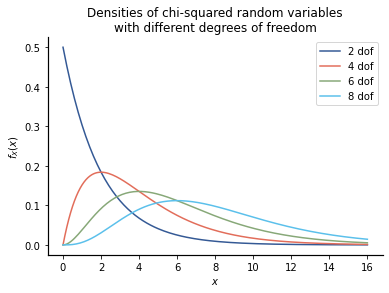

In [36]:
x = np.linspace(0, 16, 161)
for d in [2, 4, 6, 8]:
    X = stats.chi2(d)
    plt.plot(x, X.pdf(x), label=str(d) + " dof")
plt.legend()
plt.title(
    "Densities of chi-squared random variables\nwith different degrees of freedom"
)
plt.xlabel("$x$")
plt.ylabel("$f_X(x)$");

Since a random variable that is $\chi^2(M)$ can be created by summing the squares of $M$ standard normal random variables, it should be no surprise that the probability density shifts away from 0 as $M$ increases.

**Applications** Squaring is often used in engineering and sciences applications to compute power, energy, or squared error. When the items being squared have a standard normal distribution, then the resulting quantity has a chi-squared distribution. The chi-squared distribution also arises in contingency tests, which we introduce in {doc}`../12-categorical-data/outline.html`.

## Student's $t$ Random Variable

The Student's $t$ random variable arises when estimating the mean $\mu$ of data from a Normal distribution for which the variance $\sigma^2$ is also not known. The distribution takes its name from a paper by William Sealy Gossett that was published under the pen name *Student*. The paper is linked here:

[The Probable Error of a Mean by Student](https://www.york.ac.uk/depts/maths/histstat/student.pdf)

Gosset was working at the Guiness Brewery in Dublin, Ireland when he published this paper. He developed the distribution to perform statistical tests on small samples in the brewery. Thus, his derivation of the $t$ distribution was motivated by practical consideration. 

```{note}
Gosset also coined the term *Pearson's correlation* for a measure of statistical dependence of random variables, which will be introduced in {doc}`../11-matrix-vector-regression/outline.html`. 

A good discussion of Gosset's work is in the Biometrika article entitled ['"Student" as Statistician](https://www.jstor.org/stable/2332648?seq=1).
```

A brief definition of Student's $t$ distribution follows. More insight on Student's $t$ distribution and its application will be covered in **SECTION 9.5 JMS INSERT CORRECT LINK**.

````{card}
DEFINITION
^^^
```{glossary}
Student's $t$ random variable
    Like the chi-squared random variable, the Student's $t$ random variable depends on the sum of multiple other random variables, and it also has a degrees of freedom parameter, $\nu$. If $T$ is a Student's $t$ random variable with $\nu$ degrees of freedom, the pdf is
   \begin{equation}
    f(t)=\frac{\Gamma\left(\frac{\nu+1}{2}\right)}{\sqrt{\nu \pi} 
    \Gamma\left(\frac{\nu}{2}\right)}\left(1+\frac{t^{2}}{\nu}\right)^{-(\nu+1) / 2}
    \end{equation}
    Also like the chi-squared random variable, the CDF for the Student's $t$ random variable can only be written in terms of standard integral functions.
    When $\nu \rightarrow \infty$, the Student's $t$ random variable converges to a normal random variable.
```
````

We can use SciPy.stats to create a Student's $t$ distribution by using `stats.t(dof)`:

In [37]:
T = stats.t(4)

The graph below shows the pdf of Student's $t$ random variables with different degrees of freedom. Also shown is a standard Normal random variable for comparison purposes:

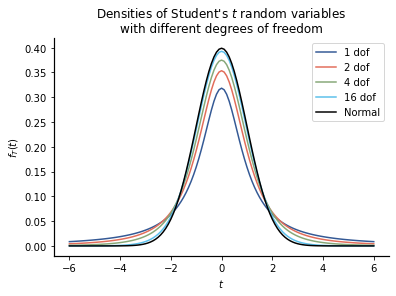

In [38]:
t = np.linspace(-6, 6, 121)
for d in [1, 2, 4, 16]:
    T = stats.t(d)
    plt.plot(t, T.pdf(t), label=str(d) + " dof")

N = stats.norm()
plt.plot(t, N.pdf(t), color="k", label="Normal")
plt.legend()
plt.title(
    "Densities of Student's $t$ random variables\nwith different degrees of freedom"
)
plt.xlabel("$t$")
plt.ylabel("$f_T(t)$");

The densities for the Student's $t$ random variables are very similar to those for the standard Normal random variable. In fact, for $\nu =16$, the density is almost identical to that of the standard Normal random variable. For lower dofs, the difference is that smaller dofs result in a greater spread of the density away from the mean. Let's check this by printing out the probability $P(|T| > 2) $ for different values of $\nu$. Note that by symmetry, $P(|T|>2) = 2*P(T>2).

In [39]:
print(f'{"DOFs": >6} | {"P(|T|>2)" : >11}')
for nu in [1, 2, 4, 16]:
    T = stats.t(nu)
    print(f'{nu :6} | {"":4}{2*T.sf(2) : .3f}')

  DOFs |    P(|T|>2)
     1 |      0.295
     2 |      0.184
     4 |      0.116
    16 |      0.063


Thus, the Student's $t$ random variable is similar to a standard normal random variable except that more of its probability density is spread out away from 0.

## Discussion

We introduced several important continuous random variables, with an emphasis on random variables that are common in statistical data or statistical tests. As we noted, SciPy.stats actually has classes for over 100 different types of continuous distributions, which can be used to model a wide variety of random phenomena.

One of the first tools to use in determing whether data can be modeled using a particular distribution is visualizing the distribution of the data. This is the topic of the next section.

## Terminology Review

In [40]:
from jupytercards import display_flashcards

#display_flashcards('flashcards/'+'important-continuous-rvs.json')

github='https://raw.githubusercontent.com/jmshea/Foundations-of-Data-Science-with-Python/main/'
github+='08-random-variables/flashcards/'
display_flashcards(github+'important-continuous-rvs.json')


